**IMPORT LIBRARY**

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

**IMPORT CSV KE DATASET**

In [109]:
df = pd.read_csv('sales.csv')
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [110]:
#eksplorasi dataset

print("informasi dataset:")
print(df.info())
print("\ndeskripsi statistik:")
print(df.describe())
print("\ncontoh data:")
print(df.head())

informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB
None

deskripsi statistik:
               W0          W1          W2          W3          W4          W5  \
count  811.000000  811.000000  811.000000  811.000000  811.000000  811.000000   
mean     8.902589    9.129470    9.389642    9.717633    9.574599    9.466091   
std     12.067163   12.564766   13.045073   13.553294   13.095765   12.823195   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      3.000000    3.000000    3.000000    4.000000    4.000000    3.000000   
75%     12.000000   12.000000   12.000000   13.000000   13.000000   12.500000   
max     54.000000   53.000000   56.000000   59.000000   61.000000   52.000000   

               W6          W7     

In [111]:
print("kolom yang tersedia dalam dataset:")
print(df.columns)

features = df[['W0', 'W1']]
features = features.dropna()

kolom yang tersedia dalam dataset:
Index(['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       ...
       'Normalized 42', 'Normalized 43', 'Normalized 44', 'Normalized 45',
       'Normalized 46', 'Normalized 47', 'Normalized 48', 'Normalized 49',
       'Normalized 50', 'Normalized 51'],
      dtype='object', length=107)


**VISUALISASI PERSEBARAN DATA**

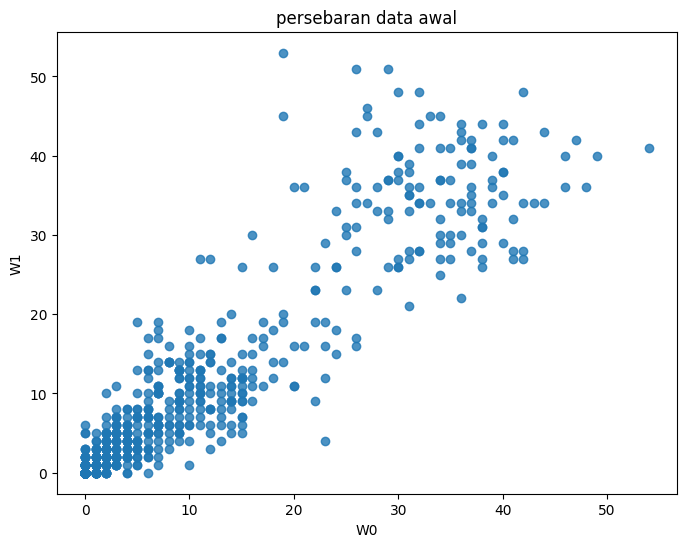

In [112]:
plt.figure(figsize=(8,6))
plt.scatter(features['W0'], features['W1'], alpha=0.8)
plt.title('persebaran data awal')
plt.xlabel('W0')
plt.ylabel('W1')
plt.show()

**DATA SCALING**

In [113]:
scaler = StandardScaler()
scaler.fit(features)
df_scaled = scaler.transform(features)
df_scaled

array([[ 0.17391867,  0.22859969],
       [-0.15776396, -0.2492208 ],
       [-0.15776396,  0.14896294],
       ...,
       [-0.65528791, -0.72704129],
       [-0.73820856, -0.72704129],
       [-0.73820856, -0.64740454]])

**MENENTUKAN K OPTIMAL DENGAN METODE ELBOW**

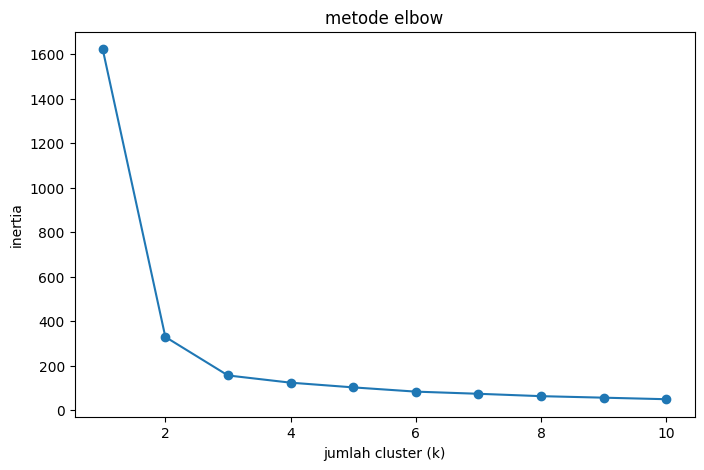

In [114]:
inertia = []

k_range = range(1,11)
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('metode elbow')
plt.xlabel('jumlah cluster (k)')
plt.ylabel('inertia')
plt.show()

In [115]:
#menjalankan k-means (dengan jumlah cluster optimal = misalnya k=3)

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(scaled_features)

#menambahkan label cluster ke dataframe asli
df['cluster'] = kmeans.labels_

**VISUALISASI CLUSTERED DATA**

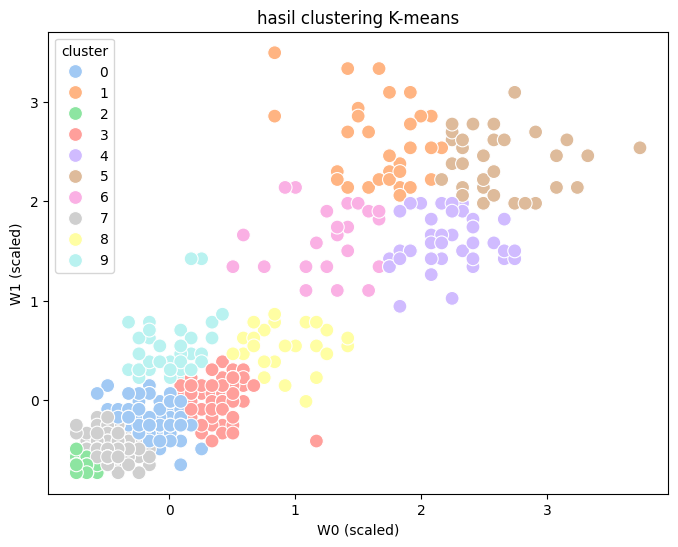

In [116]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=df['cluster'],
    palette='pastel',
    s=100
)
plt.title('hasil clustering K-means')
plt.xlabel('W0 (scaled)')
plt.ylabel('W1 (scaled)')
plt.legend(title='cluster')
plt.show()

In [117]:
print("\ndataframe denngan hasil clustering:")
print(df.head())


dataframe denngan hasil clustering:
  Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 43  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.22   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.40   
2           P3   7  11   8   9  10   8   7  13  12  ...           1.00   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.47   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.53   

   Normalized 44  Normalized 45  Normalized 46  Normalized 47  Normalized 48  \
0           0.28           0.39           0.50           0.00           0.22   
1           0.50           0.10           0.10           0.40           0.50   
2           0.18           0.18           0.36           0.45           1.00   
3           0.06           0.12           0.24           0.35           0.71   
4           0.27           0.60           0.20           0.20           0.13   

   Normalized 49  Normalized 50  Norm

**ANALISIS CENTROID**

In [118]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("\ncentroid cluster (W0 dan W1):")
print(centroids)

print("\njumlah data di setiap cluster:")
print(df['cluster'].value_counts())


centroid cluster (W0 dan W1):
[[ 7.19753086  7.16049383]
 [29.41176471 41.14705882]
 [ 0.26443769  0.29179331]
 [13.46774194  9.43548387]
 [35.375      29.25      ]
 [40.63636364 39.3030303 ]
 [23.91666667 29.08333333]
 [ 3.22962963  3.40740741]
 [20.12       15.64      ]
 [ 9.29166667 15.16666667]]

jumlah data di setiap cluster:
cluster
2    329
7    135
0     81
3     62
9     48
4     40
1     34
5     33
8     25
6     24
Name: count, dtype: int64
